# Estudo de Fronteiras de Pareto com Topologia e Geometria

A análise das fronteiras de Pareto pode ser enriquecida por uma perspectiva topológica e geométrica, onde a **topologia e a geometria de fronteiras de Pareto** é estudada para identificar a estrutura e as relações entre as soluções ótimas. Neste notebook, desenvolvemos uma abordagem que através de grafos podemos obter informações topológicas e geométricas sobre a fronteira de Pareto em qualquer dimensão.

Em geral as soluções estão em espaços de alta dimensionalidade. O uso de grafos para representar essas fronteiras torna-se uma abordagem útil, onde cada nó representa uma solução e as arestas entre os nós indicam a relação de dominância ou a proximidade topológica entre as soluções. Essa estrutura gráfica pode ser explorada para entender a topologia da fronteira, por exemplo, dimensão como subvariedade, estrutura simplicial e até mesmo utilizar topologia algébrica para obter mais informações. Bem como a estrutura gráfica pode nos auxiliar no entendimento da geometrica da fronteira de Pareto, por exemplo, se há concavidades, qual a curvatura dentre outras propriedades.

Esperamos que este desenvolvimento se torne uma ferramenta poderosa para a exploração e compreensão de problemas complexos de otimização.

## Ideia para Construção do Grafo

A fronteira de Pareto $P\subset \mathbb{R}^n$ é um subconjunto do espaço objetivo para $n$ objetivos. Ao analisar exemplos de 2 e 3 dimensões, podemos intuir, que, em geral $P$ é uma subvariedade de dimensão $n-1$. É claro que podemos construir exemplos no caso tridimensional em que a fronteira seja uma varidade de dimensão 1. Mas partindo da noção que a fronteira é uma subvariedade, podemos construir uma representação simplicial, utilizando os pontos de $P$ como sendo os 0-simplexos e conectando estes de forma a obter uma estrutura que possa nos descrever a topologia da fronteira de Pareto. 

O problema é como gerar este grafo. Uma primeira abordagem que pesamos, seria conectar os vizinhos próximos, mas aqui ocorre dois problemas:

1. O quão próximos eles devem ser para que haja conexão?

2. Se determinarmos a distância limite ou a quantidade de conexões, estamos modificando a topologia obtida com parâmetros arbitrários.

Assim, surgiu a ideia de verificar se dois pontos podem ser conectados por um segmento de reta tal que:

1. O segmento não contenha nenhum ponto dominado.

2. O segmento não contenha nenhum ponto que domine os pontos de $P$.

O código a seguir, gera uma imagem para ilustrar esta ideia no plano. No caso temos três pontos e suas conexões que não cortam a região dominada ou a região que domina alguma das soluções.

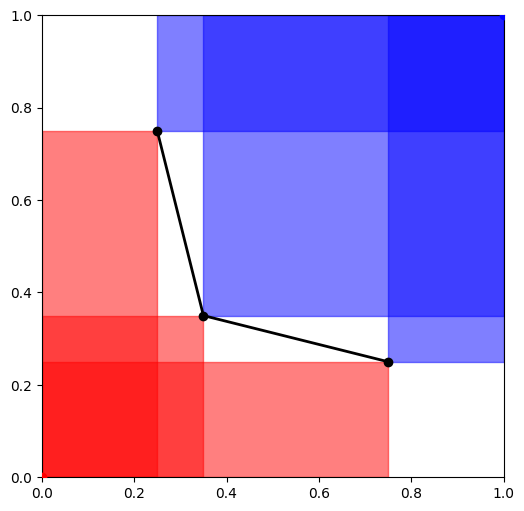

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Função para desenhar retângulos entre dois pontos
def draw_rectangle(ax, p1, p2, color):
    x_min = min(p1[0], p2[0])
    x_max = max(p1[0], p2[0])
    y_min = min(p1[1], p2[1])
    y_max = max(p1[1], p2[1])

    ax.fill_betweenx([y_min, y_max], x_min, x_max, color=color, alpha=0.5)

# Gerar pontos
p1, p2, p3 = np.array([
    [0.75, 0.25],
    [0.35, 0.35],
    [0.25, 0.75]
])

# Pontos de referência
p_ref1 = np.array([1, 1])
p_ref2 = np.array([0, 0])

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(6, 6))

# Desenhar retângulos para (1,1)
draw_rectangle(ax, p1, p_ref1, color='blue')
draw_rectangle(ax, p2, p_ref1, color='blue')
draw_rectangle(ax, p3, p_ref1, color='blue')

# Desenhar retângulos para (-1,-1)
draw_rectangle(ax, p1, p_ref2, color='red')
draw_rectangle(ax, p2, p_ref2, color='red')
draw_rectangle(ax, p3, p_ref2, color='red')

# Plotar os pontos e os segmentos
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black', linewidth=2, label='Segmento 1-2')
ax.plot([p2[0], p3[0]], [p2[1], p3[1]], color='black', linewidth=2, label='Segmento 2-3')

ax.scatter(*p1, color='black', label='Ponto 1', zorder=5)
ax.scatter(*p2, color='black', label='Ponto 2', zorder=5)
ax.scatter(*p3, color='black', label='Ponto 3', zorder=5)
ax.scatter(*p_ref1, color='blue', label='Ponto (1,1)', zorder=5)
ax.scatter(*p_ref2, color='red', label='Ponto (-1,-1)', zorder=5)

# Configurar o plano
ax.axhline(0, color='gray', linewidth=0.5, linestyle='--')
ax.axvline(0, color='gray', linewidth=0.5, linestyle='--')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='box')
plt.show()


## Verificação de Interseções

Para construção do grafo, precisamos analisar se duas soluções se conectam por um segmento de reta que não intersecte a região dominada. Existe uma maneira de abordar essa questão usando conceitos de geometria computacional e análise de interseção. Para o problema em questão, onde você tem um segmento de reta $[a,b]$ e um paralelepípedo $P = [p_1, r_1] \times \cdots \times [p_n, r_n]$ em $\mathbb{R}^n$, o teorema de separação de conjuntos convexos pode ser útil.

### Teorema de Separação de Conjuntos Convexos:

Este teorema afirma que, dado dois conjuntos convexos $A$ e $B$ em $\mathbb{R}^n$, se $A$ e $B$ são disjuntos, então existe um hiperplano que separa os dois conjuntos, isto é, existe um hiperplano $H$ tal que $A$ está de um lado de $H$ e $B$ está do outro.

No caso:

- O segmento de reta $[a,b]$ é um conjunto convexo.
- O paralelepípedo $P$ também é um conjunto convexo, pois é um produto cartesiano de intervalos em $\mathbb{R}^n$.

Assim, se a interseção entre $[a,b]$ e $P$ for vazia, então, por este teorema, existe um hiperplano que separa $[a,b]$ e $P$.

### Estratégia de Verificação:

Para garantir que $[a,b]\cap P = \emptyset$, verificamos:

#### 1. Caracterização geométrica do paralelepípedo $P$:

Suponha que o paralelepípedo $P$ seja definido como:  
$$
P = \{ x \in \mathbb{R}^n \mid \min(p_i,q_i) \leq x_i \leq \max(p_i, q_i), \, i = 1, 2, \dots, n \},
$$
onde $p = (p_1, p_2, \dots, p_n)$ e $q = (q_1, q_2, \dots, q_n)$ são os vértices opostos que determinam $P$.


#### 2. Caracterização geométrica do segmento $R$:

Seja $[a,b]$ um segmento de reta definido pelos pontos $a$ e $b$ em $\mathbb{R}^n$:  
$$
[a,b] = \{ \gamma(t) = (1 - t) a + t b \mid t \in [0, 1] \},
$$
onde $a = (a_1, a_2, \dots, a_n)$ e $b = (b_1, b_2, \dots, b_n)$ são os extremos do segmento.

#### 3. Verificando se $[a,b]\cap P$ é vazio

##### i). Verificar sobreposição em projeções:

Se uma das condições a seguir for verdadeira para alguma dimensão $i$:

- $\min(a_i, b_i) > \max(p_i,q_i)$
- $\max(a_i, b_i) < \min(p_i,q_i)$

então o segmento não intersecta $P$, pois o segmento está completamente fora na dimensão $i$. 

Observe que a reciproca é falsa, isto é, se as condições são falsas, **não** necessáriamente implica que há interseção.


##### ii). Se as projeções se sobrepõem em todas as dimensões:

Se as projeções se sobrepõem em todas as dimensões, devemos verificar os pontos de $[a,b]$ em relação às faces de $P$.
Neste caso, vamos verificamos explicitamente se o segmento corta ou não $P$. 

- Para cada plano $x_i = p_i$ e $x_i = q_i$, resolva a equação da reta para encontrar os valores de $t$:  

    $$
    \gamma(t) = (1 - t)a_i + t b_i.
    $$

- Verifique se os pontos de interseção estão dentro de $P$ e no intervalo $t \in [0, 1]$.

Para isso, podemos parametrizar o segmento como:

$$
\gamma(t)=a + t (b-a), t\in[0,1].
$$

Definimos $d=b-a$, e calculamos o valor de $t$ para entrada e saída do intervalo delimitado pelo paralelepípedo:

$$
t_1=\frac{\min(p_i,q_i)-a_i}{d_i},\text{ }t_2=\frac{\max(p_i,q_i)-a_i}{d_i}
$$

Ordenamos os valores: $t_in=\min(t_1,t_2)$ e $t_out=\max(t_1,t_2)$.

A cada iteração atualizamos os valores do intervalo de entrada e saída global:
- $t_min=\max(t_min, t_in)$
- $t_max=\min(t_max, t_out)$

Assim, se ocorrer $t_min>t_max$ obtemos que o segmento $[a,b]$ não intersecta $P$. 

O código a seguir utiliza este algoritmo para verificar se um paralelepípedo determinado pelos pontos $p$ e $q$ é intersectado pelo segmento de reta que conecta os pontos $a$ e $b$.

In [2]:
import numpy as np

def segment_intersects_parallelepiped(p, q, a, b):
    """
    Verifica se o segmento de reta R (definido por a e b) intersecta
    o paralelepípedo P (definido pelos vértices opostos p e q).

    Args:
        p (array-like): Ponto extremo do paralelepípedo.
        q (array-like): Ponto extremo oposto a p do paralelepípedo.
        a (array-like): Ponto inicial do segmento.
        b (array-like): Ponto final do segmento.

    Returns:
        bool: True se o segmento intersecta o paralelepípedo, False caso contrário.
    """
    a = np.array(a)
    b = np.array(b)
    p = np.array(p)
    q = np.array(q)

    # 1. Verificar se as projeções do segmento em cada dimensão não se sobrepõem
    for i in range(len(p)):
        # Projeção do paralelepípedo no eixo i
        min_p = min(p[i], q[i])
        max_p = max(p[i], q[i])
        
        # Projeção da reta no eixo i
        min_l = min(a[i], b[i])
        max_l = max(a[i], b[i])
                
        # Verifica se os intervalos se sobrepõem
        if max_p <= min_l or max_l <= min_p: # Modificar para < caso queira inserir os extremantes do segmento
            return False

    # 2. Verificar interseção com as faces do paralelepípedo
    # Parametrização do segmento: p(t) = a + t * (b - a), t \in [0, 1]
    t_min = 0
    t_max = 1
    d = b - a # Vetor diretor do segmento

    for i in range(len(p)):
        if d[i] != 0:  # Evitar divisão por zero, se d=0 o segmento é paralelo à dimensão i
            min_p = min(p[i], q[i])
            max_p = max(p[i], q[i])
            
            t1 = (min_p - a[i]) / d[i]  # Entrada no plano x_i = p_i
            t2 = (max_p - a[i]) / d[i]  # Saída no plano x_i = q_i

            t_enter, t_exit = min(t1, t2), max(t1, t2)

            t_min = max(t_min, t_enter)  # Atualiza o limite mínimo
            t_max = min(t_max, t_exit)  # Atualiza o limite máximo

            if t_min > t_max:  # Se os limites se cruzam, não há interseção
                return False
        elif not (p[i] <= a[i] <= q[i]):  # Segmento paralelo fora dos limites implica em não interseção
            return False

    # Se passamos por todas as dimensões, há interseção
    return True

### Funções auxiliares para plotagem de gráficos em 2D e 3D

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3d_intersection(p, r, a, b, intersect):
    """
    Plota o paralelepípedo e o segmento de reta, e indica se houve interseção.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Paralelepípedo
    # Gerar as 8 coordenadas do paralelepípedo
    corners = np.array([[p[0], p[1], p[2]], [r[0], p[1], p[2]], [r[0], r[1], p[2]], [p[0], r[1], p[2]], 
                        [p[0], p[1], r[2]], [r[0], p[1], r[2]], [r[0], r[1], r[2]], [p[0], r[1], r[2]]])
    
    # Faces do paralelepípedo (pares de índices que formam as faces)
    faces = [[0,1,2,3], [4,5,6,7], [0,1,5,4], [2,3,7,6], [0,3,7,4], [1,2,6,5]]
    
    # Plot do paralelepípedo
    ax.add_collection3d(Poly3DCollection([corners[face] for face in faces], color='green', linewidths=1, edgecolors='r', alpha=0.25))
    
    # Reta
    ax.plot([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], color='blue', linewidth=1)

    # Ajustes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Interseção' if intersect else 'Sem Interseção')
    plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_intersection(p, r, a, b, intersect):
    """
    Plota o paralelepípedo e o segmento de reta, e indica se houve interseção em R^2.
    """
    fig, ax = plt.subplots()

    # Paralelepípedo: Representado por um quadrado (retângulo) no plano R^2
    corners = np.array([[p[0], p[1]], [r[0], p[1]], [r[0], r[1]], [p[0], r[1]], [p[0], p[1]]])
    
    # Plot do paralelepípedo
    ax.plot(corners[:, 0], corners[:, 1], color='red', linewidth=2, label="Paralelepípedo", alpha=0.5)
    
    # Reta
    ax.plot([a[0], b[0]], [a[1], b[1]], color='blue', linewidth=2, label="Segmento")

    # Ajustes de plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Interseção' if intersect else 'Sem Interseção')
    ax.legend()
    plt.grid(True)
    plt.show()

### Exemplos de Verificação da Interseção

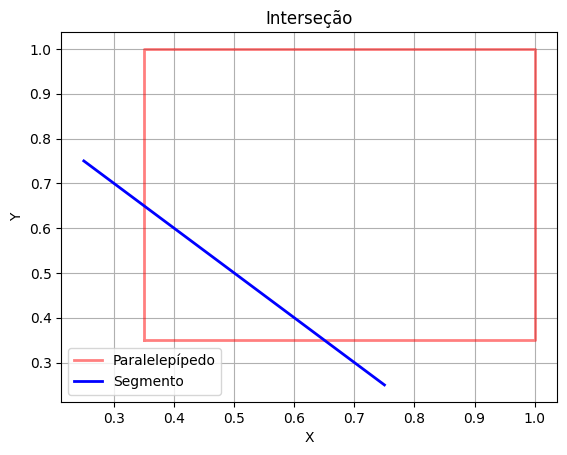

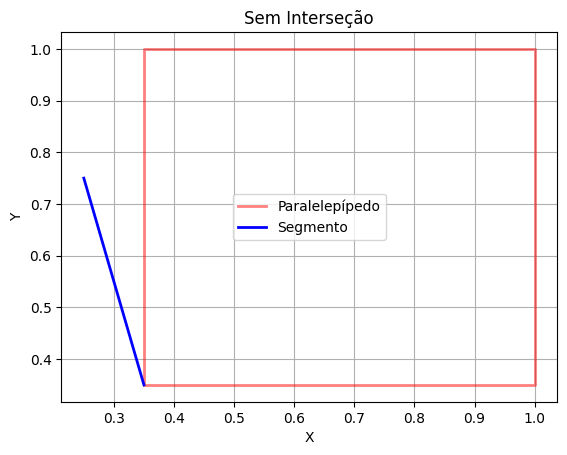

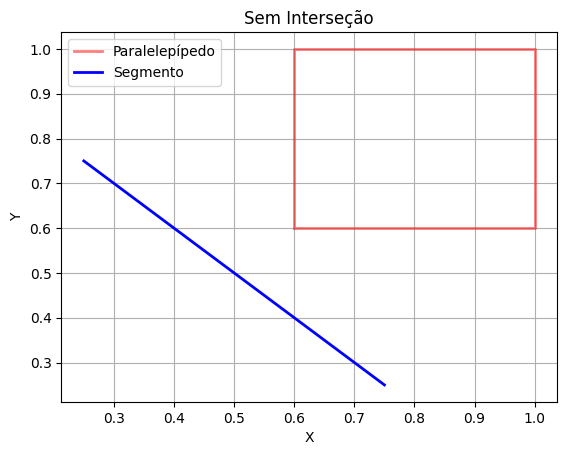

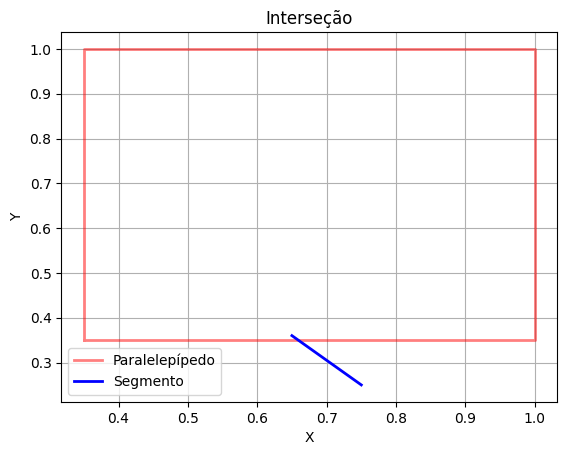

In [5]:
ex = np.array([
    [0.75, 0.25],
    [0.35, 0.35],
    [0.25, 0.75],
    [0.6, 0.6],
    [0.65, 0.36]
])
ref = [1, 1]

# Verifica se há interseção
intersect1 = segment_intersects_parallelepiped(ex[1], ref, ex[0], ex[2])
plot_2d_intersection(ex[1], ref, ex[0], ex[2], intersect1)

# Verifica se há interseção
intersect2 = segment_intersects_parallelepiped(ex[1], ref, ex[1], ex[2])
plot_2d_intersection(ex[1], ref, ex[1], ex[2], intersect2)

# Verifica se há interseção
intersect1 = segment_intersects_parallelepiped(ex[3], ref, ex[0], ex[2])
plot_2d_intersection(ex[3], ref, ex[0], ex[2], intersect1)

# Verifica se há interseção
intersect1 = segment_intersects_parallelepiped(ex[1], ref, ex[0], ex[4])
plot_2d_intersection(ex[1], ref, ex[0], ex[4], intersect1)

## Método de construção do Grafo

A seguir apresentamos o método de construção do grafo topológico.

In [6]:
import networkx as nx

def build_graph(points: list[tuple], ref_point: tuple, base_point: tuple = None) -> nx.Graph:
    G = nx.Graph()

    # Adiciona os vértices
    for i, p in enumerate(points):
        G.add_node(i, point=p)
        
    for i, p in enumerate(points):
        for j, q in enumerate(points):
            if np.array_equal(p, q):
                continue
            add = True
            for k, r in enumerate(points):
                if np.array_equal(r, p) or np.array_equal(r, q):
                    continue
                if segment_intersects_parallelepiped(r, ref_point, p, q):
                    add = False
                    break
                if base_point is not None:
                    if segment_intersects_parallelepiped(r, base_point, p, q):
                        add = False
                        break
            if add:
                G.add_edge(i,j)
    return G           

### Exemplos de Construção do Grafo

O exemplo a seguir mostra que para o caso geral em que a fronteira de Pareto tenha curvatura constante e positiva o método utilizando apenas a parte dominada é satisfatório para construção de um grafo que representa a topologia dos pontos da fronteira.

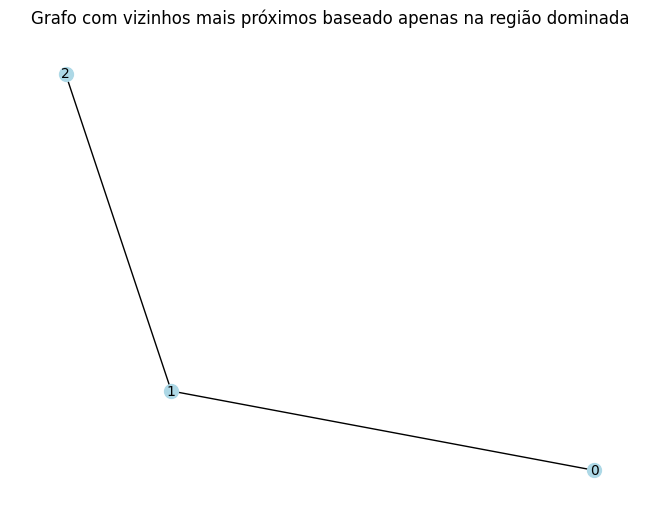

In [7]:
import matplotlib.pyplot as plt

ex = np.array([
    [0.75, 0.25],
    [0.35, 0.35],
    [0.25, 0.75]
])
ref = [1, 1]

graph = build_graph(ex, ref)

# Exibir a posição dos pontos (nos do grafo)
pos = nx.get_node_attributes(graph, 'point')

# Visualizar o grafo
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos baseado apenas na região dominada")
plt.show()     

O examplo a seguir mostra um caso onde o uso do método parcial em relação ao completo, pode ser util para identificar concavidades na fronteira de Pareto. No entanto, na versão atual do algoritmo de construção do gráfico, isto funciona apenas para $\mathbb{R}^2$, para as dimensões maiores precisaremos melhorar a construção do grafo para a construção de um hipergrafo que tenha melhor correspondência com a estrutura simplicial da fronteira. 

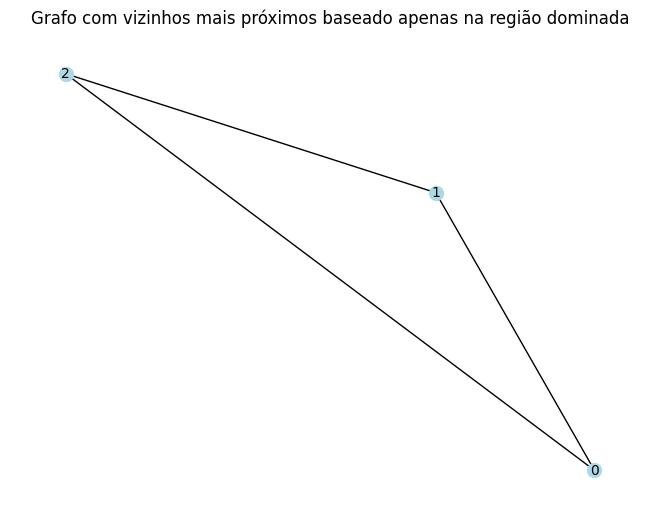

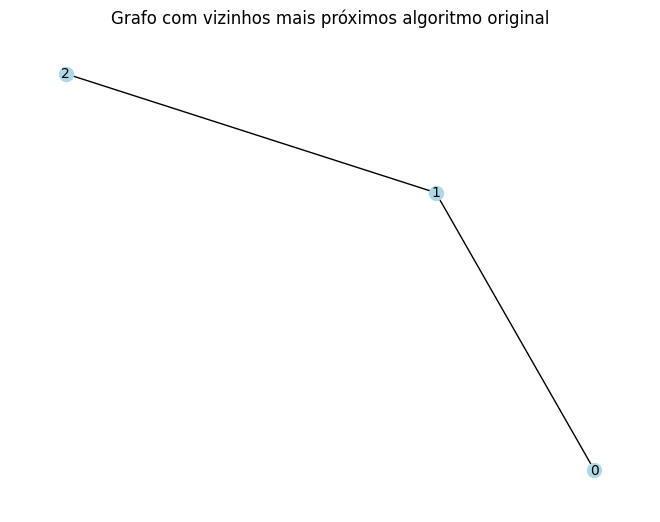

In [8]:
import matplotlib.pyplot as plt

ex = np.array([
    [0.75, 0.25],
    [0.6, 0.6],
    [0.25, 0.75]
])
ref = [1, 1]
base = [0, 0]

graph = build_graph(ex, ref)

# Exibir a posição dos pontos (nos do grafo)
pos = nx.get_node_attributes(graph, 'point')

# Visualizar o grafo
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos baseado apenas na região dominada")
plt.show()     

graph = build_graph(ex, ref, base)

# Exibir a posição dos pontos (nos do grafo)
pos = nx.get_node_attributes(graph, 'point')

# Visualizar o grafo
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos algoritmo original")
plt.show()      

Exemplo em $\mathbb{R}^3$

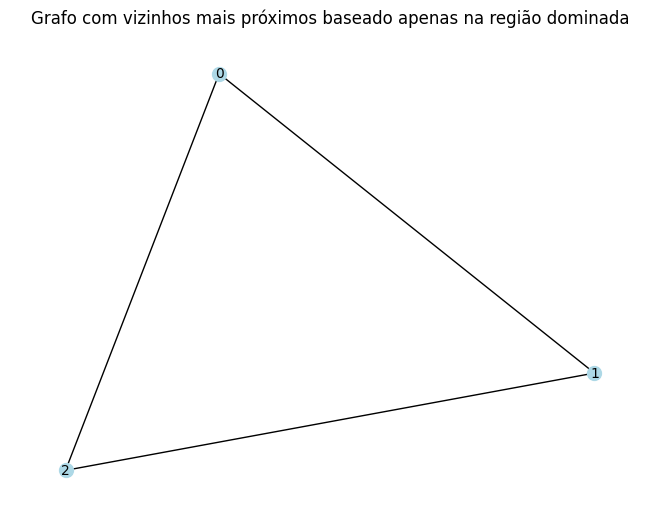

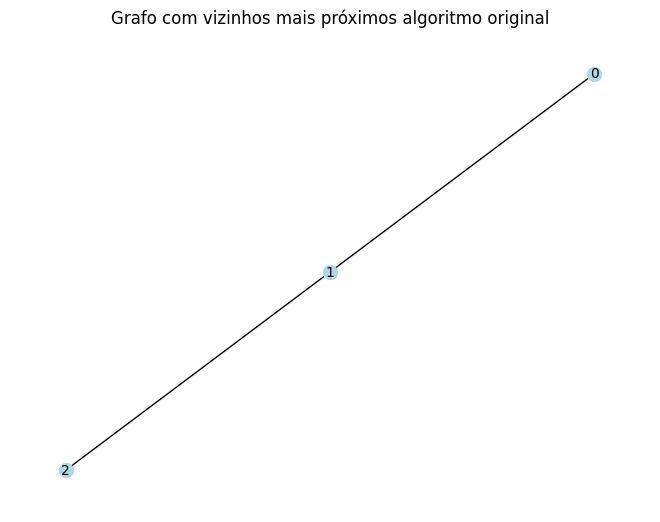

In [9]:
import matplotlib.pyplot as plt

ex = np.array([
    [0.2, 0.8, 0.6],
    [0.5, 0.6, 0.4],
    [0.7, 0.3, 0.2]
])
ref = [1, 1, 1]
base = [0, 0, 0]

graph = build_graph(ex, ref)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos baseado apenas na região dominada")
plt.show() 

graph = build_graph(ex, ref, base)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos algoritmo original")
plt.show() 

Exemplo com simplexo padrão em $\mathbb{R}^3$

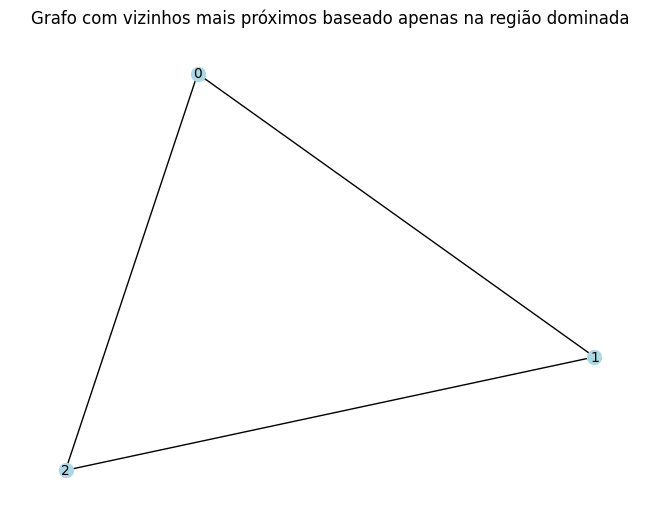

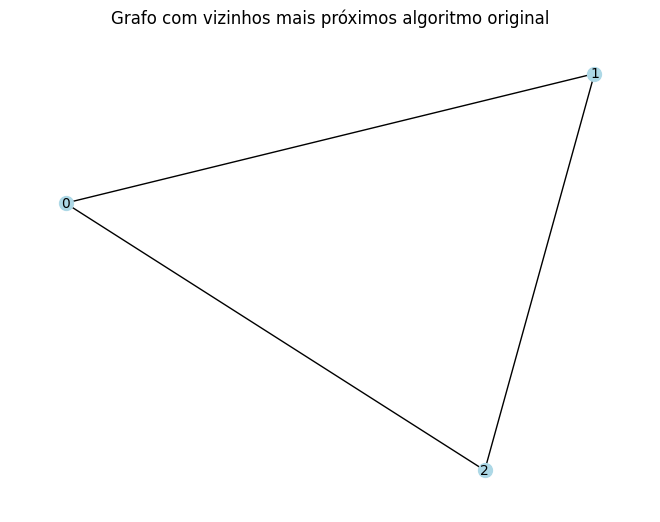

In [10]:
import matplotlib.pyplot as plt

ex = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
ref = [1, 1, 1]
base = [0, 0, 0]

graph = build_graph(ex, ref)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos baseado apenas na região dominada")
plt.show() 

graph = build_graph(ex, ref, base)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos algoritmo original")
plt.show() 

Exemplo com simplexo padrão em $\mathbb{R}^4$

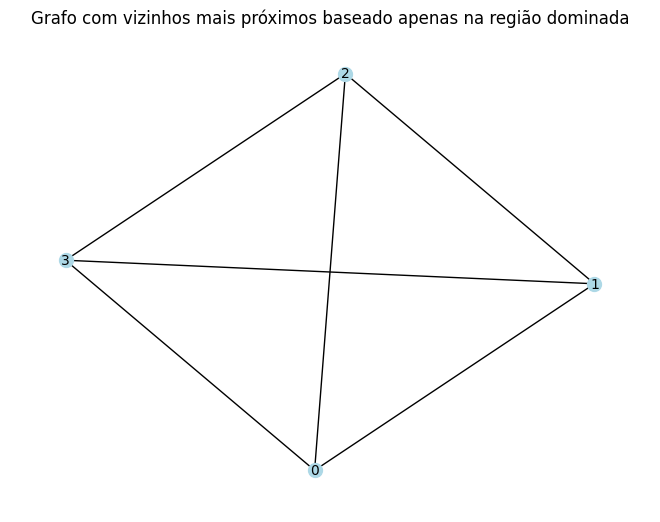

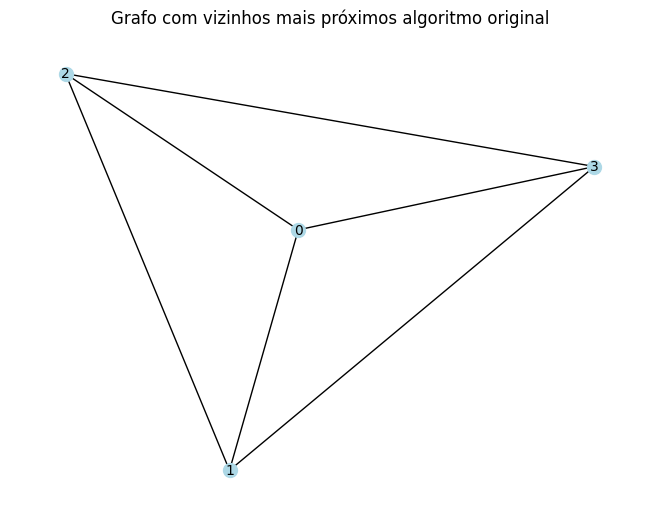

In [11]:
import matplotlib.pyplot as plt

ex = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
ref = [1, 1, 1, 1]
base = [0, 0, 0, 0]

graph = build_graph(ex, ref)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos baseado apenas na região dominada")
plt.show() 

graph = build_graph(ex, ref, base)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos algoritmo original")
plt.show() 

Exemplo que ilustra não ser possível detecção de concavidade, tal como no exemplo em $\mathbb{R}^2$ para dimensões maiores. No exemplo, poderiamos interpretar o resultado como sendo um elemento de dimenção 3, um tetraedro formado pelo o ponto $(0.5,0.5,0.5)$ e o simplexo padrão. Mas a face formada pelo simplexo padrão, intersectaria a região dominada. Por isso, a iterpretação de clicks para dimensões simpliciais não pode ser aplicada ao grafo atual.

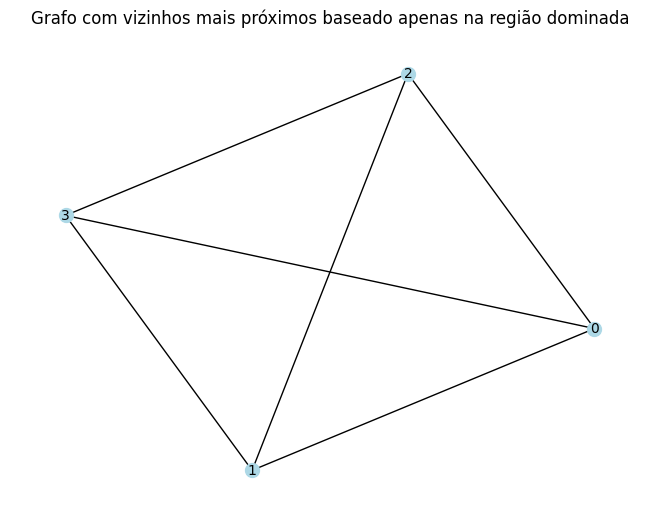

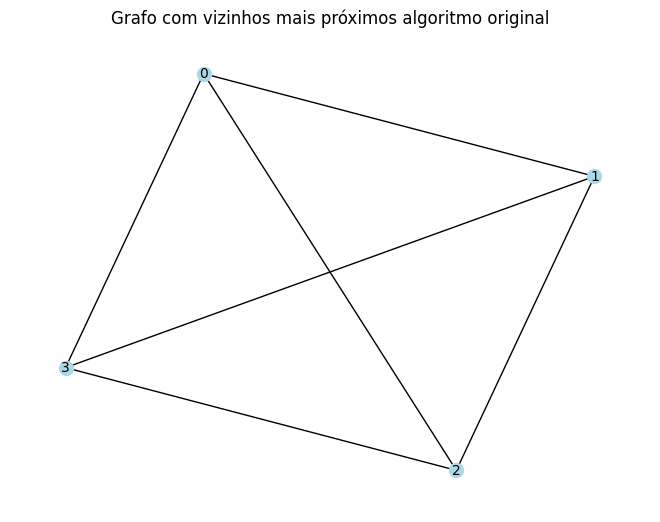

In [12]:
import matplotlib.pyplot as plt

ex = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [0.5, 0.5, 0.5]
])
ref = [1, 1, 1]
base = [0, 0, 0]

graph = build_graph(ex, ref)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos baseado apenas na região dominada")
plt.show() 

graph = build_graph(ex, ref, base)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos algoritmo original")
plt.show() 

Apenas para mostrar o potêncial desta análise em dimensões maiores.

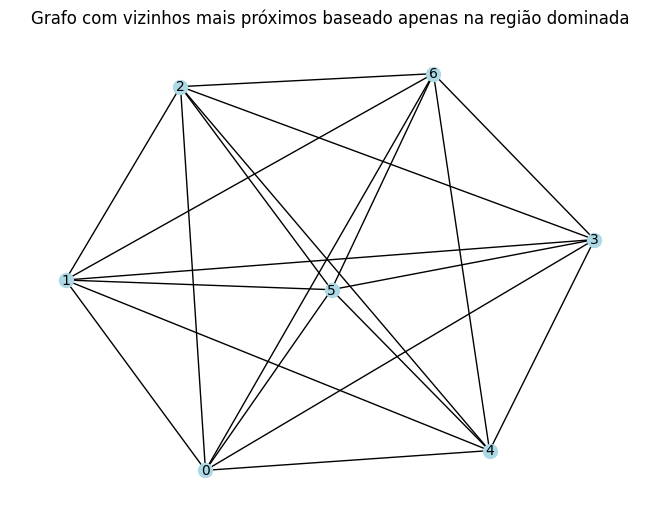

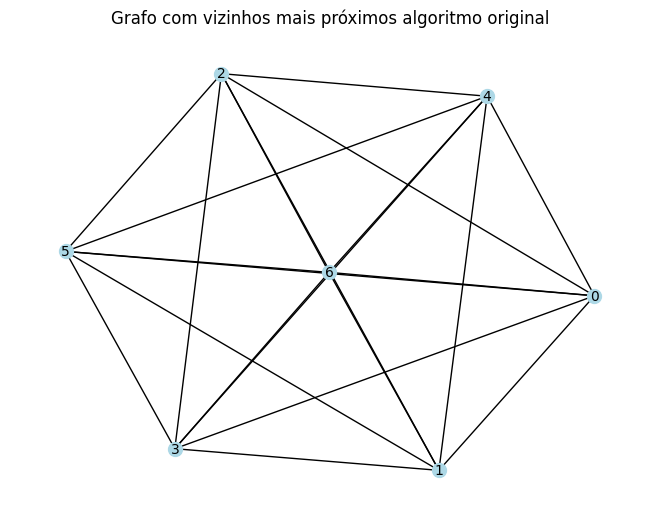

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sample_from_simplex(n, num_points):
    r"""
    Gera pontos uniformemente distribuídos no simplexo padrão \Delta^n.
    
    Parâmetros:
        n (int): Dimensão do simplexo.
        num_points (int): Número de pontos a serem gerados.
    
    Retorna:
        np.ndarray: Array de forma (num_points, n), onde cada linha é um ponto no simplexo.
    """
    # Gera num_points amostras de tamanho n+1
    samples = np.random.exponential(scale=1.0, size=(num_points, n))
    # Normaliza para que a soma de cada linha seja 1
    simplex_points = samples / samples.sum(axis=1, keepdims=True)
    return simplex_points

ex = sample_from_simplex(4, 7)

ref = [1] * 6
base = [0] * 6

graph = build_graph(ex, ref)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos baseado apenas na região dominada")
plt.show() 

graph = build_graph(ex, ref, base)

pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title("Grafo com vizinhos mais próximos algoritmo original")
plt.show() 

### Próximos passos

1. Revisar o método de construção de modo a construir células de dimensões maiores.

2. Utilizando esta técnica realizar análise topológica de resultados reais dos algoritmos NSGA.